## PROJET_3 **************              Etape_1:  NETTOYAGE DES DONNEES


### Lecture des donnees

In [43]:
# from google.colab import drive
# drive.mount('/content/drive')

In [44]:
# IMPORT LIBRAIRIES
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [45]:
#OPTIONS DIVERSES 
# pd.options.display.max_columns=1000
# pd.options.display.max_rows=1000
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
# pd.set_option("precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [46]:
# DEFINITION DU CHEMIN POUR LA LECTURE DES DONNEES
path='fr.openfoodfacts.org.products.csv'
# path='/content/drive/MyDrive/fr.openfoodfacts.org.products.csv'

In [47]:
# LECTURE DONNEES AVEC CHUNKSIZE
chunksize = 100000
chunks = []
for chunk in pd.read_csv(path, sep="\t",low_memory=False,chunksize=chunksize):
    chunks.append(chunk)
df = pd.concat(chunks, axis=0)

In [48]:
# PREMIERES LIGNES

df.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.00,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.00,NaN,NaN,0.00,...,3.57,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.00,14.00,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0.00,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.00,NaN,NaN,0.00,...,17.86,NaN,NaN,NaN,0.64,0.25,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN


In [49]:
# DERNIERES LIGNES

df.tail(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,Plastique,plastique,乐吧,乐吧,Potato chips,"en:salty-snacks,en:appetizers,en:chips-and-fri...","Snacks salés,Apéritif,Chips et frites,Chips,Ch...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,China,en:china,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,NaN,NaN,Knorr,knorr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320771,999990026839,http://world-fr.openfoodfacts.org/produit/9999...,usda-ndb-import,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",NaN,NaN,Plastique,plastique,Market Pantry,market-pantry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Citric acid, maltodextrin, instant tea, aspart...",NaN,NaN,NaN,NaN,NaN,1 g (0.5 PACKET),NaN,7.00,[ citric-acid -> en:e330 -> exists -- ok ]...,"en:e330,en:e951,en:e150a,en:e950,en:e552,en:e1...","E330 - Acide citrique,E951 - Aspartame,E150a -...",0.00,NaN,NaN,0.00,...,0.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# AFFICHAGE ALEATOIRE

df.sample(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
166261,0858732003246,http://world-fr.openfoodfacts.org/produit/0858...,usda-ndb-import,1489135106,2017-03-10T08:38:26Z,1489135106,2017-03-10T08:38:26Z,Organic Extra Virgin Olive Oil,NaN,NaN,NaN,NaN,Enzo,enzo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Extra virgin olive oil from 100% organic olive...,NaN,NaN,NaN,NaN,NaN,15 ml (1 Tbsp),NaN,0.00,[ extra-virgin-olive-oil-from-100-organic-oli...,NaN,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193726,3100080006422,http://world-fr.openfoodfacts.org/produit/3100...,tacinte,1441219615,2015-09-02T18:46:55Z,1441264206,2015-09-03T07:10:06Z,Soupe tomate cerise basilic,NaN,50 cl,"Bouteille,Verre","bouteille,verre",Giraudet,giraudet,"Plats préparés,Soupes,Soupes à la tomate,Soupe...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,NaN,NaN,Point Vert,en:green-dot,Point Vert,FR 01.053.006 EC,fr-01-053-006-ec,"46.2,5.216667",NaN,bourg-en-bresse-ain-france,NaN,NaN,France,en:france,France,"Eau, tomates cerise (25%), purée de tomates, p...",céleri,NaN,NaN,NaN,NaN,NaN,NaN,0.00,[ eau -> fr:eau ] [ tomates-cerise -> fr:to...,NaN,NaN,0.00,NaN,NaN,0.00,...,0.80,NaN,NaN,NaN,0.90,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,3.00,NaN,NaN
218583,3268350120343,http://world-fr.openfoodfacts.org/produit/3268...,openfoodfacts-contributors,1431158089,2015-05-09T07:54:49Z,1490432062,2017-03-25T08:54:22Z,Sablés pur beurre citron,NaN,175 g,"Boîte,Carton","boite,carton",Le moulin du pivert,le-moulin-du-pivert,"Biscuits,Sablés","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,NaN,NaN,NaN,"Organic, EU Organic, fr:AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique",NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.30,NaN,NaN,NaN,0.31,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,19.00,NaN,NaN


#### Examen Noms Des Colonnes

In [51]:
noms_colonnes=pd.DataFrame(df.columns)
noms_colonnes

,0
0,code
1,url
2,creator
3,created_t
4,created_datetime
5,last_modified_t
6,last_modified_datetime
7,product_name
8,generic_name
9,quantity


In [52]:
# EXAMEN DES TYPES
df_type=pd.DataFrame(df.dtypes)
df_type


,0
code,object
url,object
creator,object
created_t,object
created_datetime,object
last_modified_t,object
last_modified_datetime,object
product_name,object
generic_name,object
quantity,object


### Définition des variables

Variable la plus importante: **Nutriscore**
    
Mode de Calcul: à examiner

REMARQUES:

Nous avons une longue liste de variables.Nous devons selectionner celles qui sont pertinentes pour 

l'étude

Il y a 5 Types de variables pour:

1-General Informations 

2-Tags

3-ingredients

4-Misc. Data

5-nutrition facts:(Apports nutritionnels)



**Bon Aliments**: critères

 Les aspects positifs incluent la teneur en fruits, en légumes, en légumineuses, en fruits à coque, 
 
 en certaines huiles, en fibres alimentaires et en protéines. 



**Mauvais aliments:**

sucré, salé, riche en acides gras saturés ou en énergie (calories).

### Idée d' Application

Suggerer une application permettant aux personnes diabétiques à choisir des produits compatibles

à leur état en évitant entre autre ceux à forte charge glycémique.

##### Questions



**1-Pouvons-nous regrouper les articles par catégorie, pays et mot-clés?**

**2-Pouvons nous valoriser ces informations en exploitant ces catégories, pays et mots-clés?**


### Fitrage jeu  de donnees: lignes, colonnes

##### Création Copie du Jeu de Donnée

In [53]:
# COPIE DU JEU DE DONNEES
df_reduit=df

**Groupe de variables jeu de données**

var_info_gles

var_tags

var_ingredients

var_misc-data

var_nutrition_facts

##### **Recuperation de tous les noms de variables**

In [54]:
# RECUPERATION DE TOUS LES NOMS DE VARIABLES
var_list_all = df_reduit.columns.values.tolist()
var_list_all

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

##### Taux de remplissage des caracteristiques

In [55]:
# Nbre de valeurs non nulles pour chaque variable
taux_remplissage=df_reduit.count()
print(taux_remplissage.sort_values(ascending=False),'\n'*2)

last_modified_t                               320772
last_modified_datetime                        320772
creator                                       320770
created_t                                     320769
created_datetime                              320763
code                                          320749
url                                           320749
states_fr                                     320726
states_tags                                   320726
states                                        320726
countries                                     320492
countries_fr                                  320492
countries_tags                                320492
product_name                                  303010
brands                                        292360
brands_tags                                   292352
energy_100g                                   261113
proteins_100g                                 259922
salt_100g                                     

In [56]:
# Pourcentage du taux de remplissage
taux_remplissage_pourcentage=df_reduit.count()/df_reduit.shape[0]*100
print(taux_remplissage_pourcentage.sort_values(ascending=False))

last_modified_t                              100.00
last_modified_datetime                       100.00
creator                                      100.00
created_t                                    100.00
created_datetime                             100.00
code                                          99.99
url                                           99.99
states_fr                                     99.99
states_tags                                   99.99
states                                        99.99
countries                                     99.91
countries_fr                                  99.91
countries_tags                                99.91
product_name                                  94.46
brands                                        91.14
brands_tags                                   91.14
energy_100g                                   81.40
proteins_100g                                 81.03
salt_100g                                     79.65
sodium_100g 

##### Graphique

Text(0.5, 1.0, 'Taux De Remplissage')

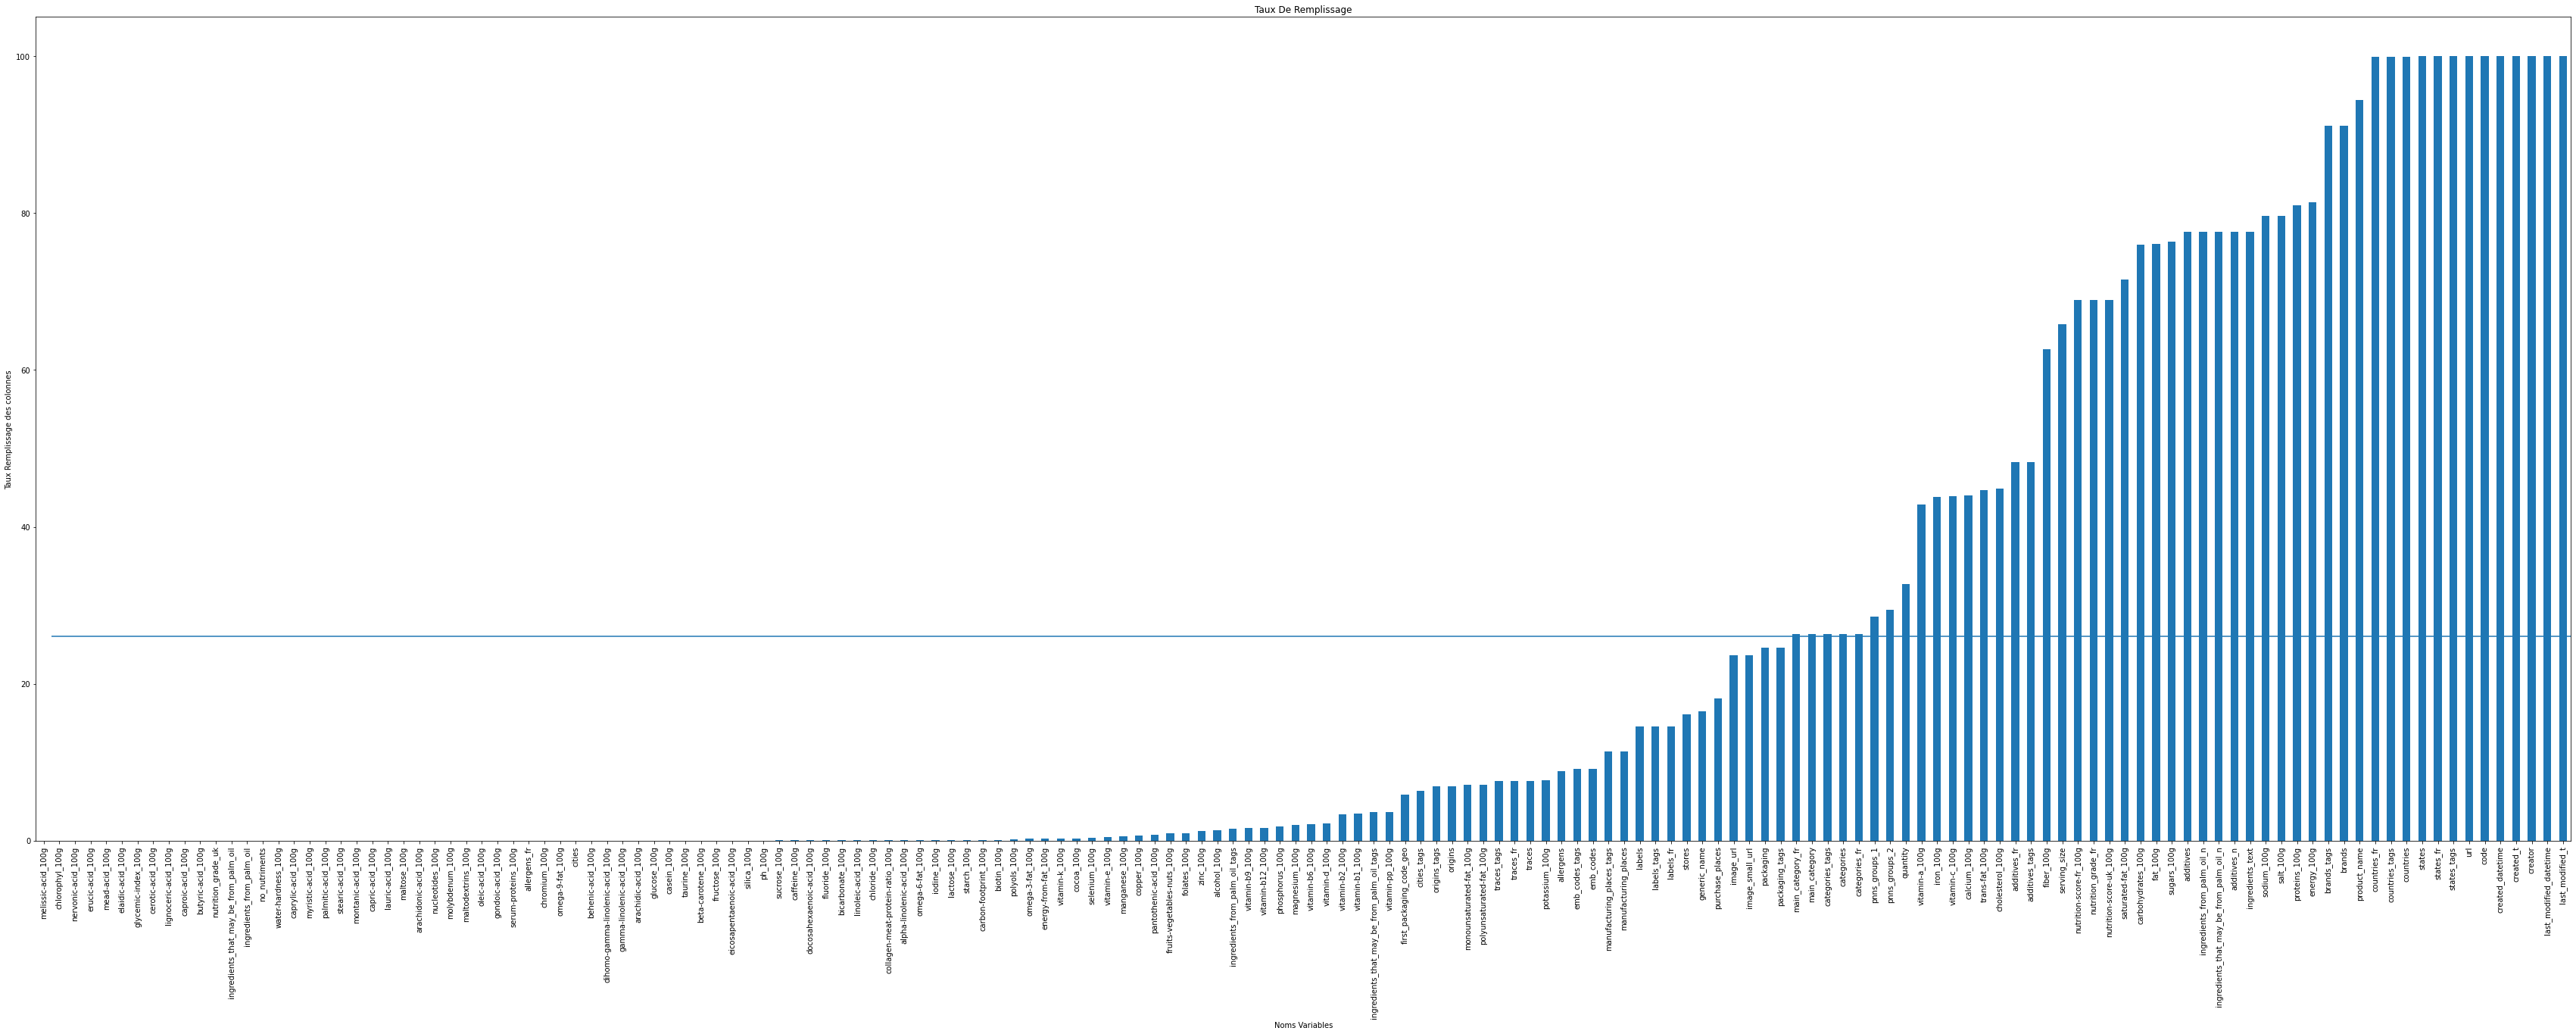

In [57]:
plt.figure(figsize=(60, 20))
taux_remplissage_pourcentage.sort_values().plot(kind='bar',width=0.5)
plt.hlines(y=26,
           xmin=0.5,
           xmax=taux_remplissage.shape,colors=None,
           linestyles='solid',
           label='Taux de Remplissage'
          ) 
plt.xlabel('Noms Variables')
plt.ylabel('Taux Remplissage des colonnes')
plt.title('Taux De Remplissage')

REMARQUE

Barre horizontale dans le graphique ci dessus fixée a 26%

##### Suppression variables a taux < X%

In [58]:
#### Calcul du seuil fixé a X%

seuil=df_reduit.shape[0]*0.26
print('Nombre d observation minimum:',seuil)

Nombre d observation minimum: 83400.72


In [59]:
##### Selection des  variables a taux > X%

df_reduit_avec_taux=df_reduit.loc[:,df_reduit.count()>=seuil]
print('Avant',df_reduit.shape)
print('apres',df_reduit_avec_taux.shape)

Avant (320772, 162)
apres (320772, 50)


In [60]:
df_reduit_avec_taux.count()


code                                       320749
url                                        320749
creator                                    320770
created_t                                  320769
created_datetime                           320763
last_modified_t                            320772
last_modified_datetime                     320772
product_name                               303010
quantity                                   104819
brands                                     292360
brands_tags                                292352
categories                                  84410
categories_tags                             84389
categories_fr                               84411
countries                                  320492
countries_tags                             320492
countries_fr                               320492
ingredients_text                           248962
serving_size                               211331
additives_n                                248939


REMARQUES:
    
    Il y a maintenant 50 variables 

<AxesSubplot:>

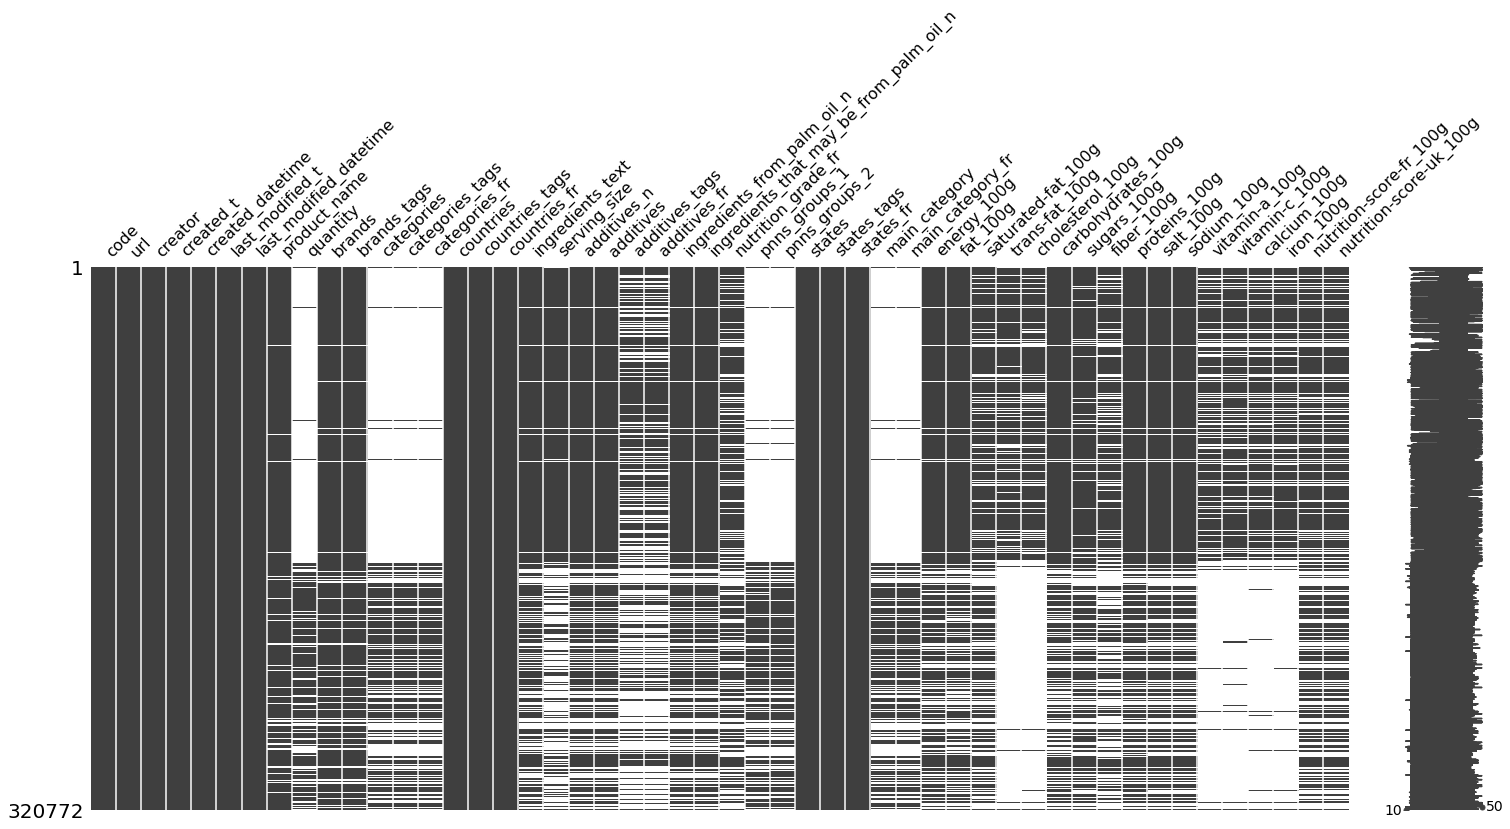

In [61]:
# GRAPHIQUE VALEURS MANQUANTES
msno.matrix(df_reduit_avec_taux)


REMARQUE

Nous observons de grandes bandes blanches/ une colonne est entierement blanche: à supprimer en 

priorité.

In [62]:
df_reduit_avec_taux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 50 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320770 non-null  object 
 3   created_t                                320769 non-null  object 
 4   created_datetime                         320763 non-null  object 
 5   last_modified_t                          320772 non-null  object 
 6   last_modified_datetime                   320772 non-null  object 
 7   product_name                             303010 non-null  object 
 8   quantity                                 104819 non-null  object 
 9   brands                                   292360 non-null  object 
 10  brands_tags                     

##### **Selection de variables a retenir**

**Colonnes essentielles à retenir en premier:**

-Nutriscore

-categories

-pays

-tags

**Colonnes necessaires pour l'application**

En se basant sur la nutrition des diabetiques, nous avons les conclusions suivantes:

• nutriments et aliments à favoriser :
    fibres,
    protéines,
    fruits et
    légumes ;

• nutriments à limiter :
    énergie,
    acides gras saturés,
    sucres,
    sel.

Ceci va nous aider à la selection de variables.

**REMARQUES:**

-les variables relatives a ces nutriments ou aliments 
doivent etre intégrer à l analyse

##### Suppression de nouvelles variables

In [63]:
#RECUPERATION DE NOUVELLES VARIABLES
var_list_all_taux = df_reduit_avec_taux.columns.values.tolist()
var_list_all_taux

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [64]:
#SELECTION DE VARIABLES
noms_de_colonnes=[
'code',
#  'url',
#  'creator',
#  'created_t',
#  'created_datetime',
#  'last_modified_t',
 'last_modified_datetime',
 'product_name',
#  'quantity',
#  'brands',
#  'brands_tags',
#  'categories',
#  'categories_tags',
 'categories_fr',
#  'countries',
#  'countries_tags',
 'countries_fr',
#  'ingredients_text',
#  'serving_size',
#  'additives_n',
#  'additives',
 'additives_tags',
 'additives_fr',
#  'ingredients_from_palm_oil_n',
#  'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
#  'states',
#  'states_tags',
#  'states_fr',
 'main_category',
 'main_category_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
#  'cholesterol_100g',
 'carbohydrates_100g',
#  'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
# 'sodium_100g',
#  'vitamin-a_100g',
#  'vitamin-c_100g',
#  'calcium_100g',
#  'iron_100g',
 'nutrition-score-fr_100g',
#  'nutrition-score-uk_100g'
]
noms_de_colonnes

['code',
 'last_modified_datetime',
 'product_name',
 'categories_fr',
 'countries_fr',
 'additives_tags',
 'additives_fr',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'main_category',
 'main_category_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'carbohydrates_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

In [65]:
df_reduit_avec_taux=df_reduit_avec_taux[noms_de_colonnes]
df_reduit_avec_taux.head(3)

,code,last_modified_datetime,product_name,categories_fr,countries_fr,additives_tags,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,3087,2016-09-17T09:18:13Z,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,États-Unis,NaN,NaN,d,NaN,NaN,NaN,NaN,2243.00,28.57,28.57,0.00,64.29,3.60,3.57,0.00,14.00
2,4559,2017-03-09T14:32:37Z,Peanuts,NaN,États-Unis,NaN,NaN,b,NaN,NaN,NaN,NaN,1941.00,17.86,0.00,0.00,60.71,7.10,17.86,0.64,0.00


**Nouveau fichier avec de nouvelles variables**

In [66]:
# NOUVEAU JEU DE DONNEES

#df_reduit_new=df_reduit[var_list_new]
print(' Dimension Nouveau Jeu De Donnée:',df_reduit_avec_taux.shape,'\n', 
      'Dimension Ancien Jeu De Donnée:',df.shape)

 Dimension Nouveau Jeu De Donnée: (320772, 21) 
 Dimension Ancien Jeu De Donnée: (320772, 162)


In [67]:
#DESCRIPTION DES VARIABLES NUMERIQUE
df_reduit_avec_taux.describe().T

,count,mean,std,min,25%,50%,75%,max
energy_100g,261113.00,1141.91,6447.15,0.00,377.00,1100.00,1674.00,3251373.00
fat_100g,243891.00,12.73,17.58,0.00,0.00,5.00,20.00,714.29
saturated-fat_100g,229554.00,5.13,8.01,0.00,0.00,1.79,7.14,550.00
trans-fat_100g,143298.00,0.07,1.54,-3.57,0.00,0.00,0.00,369.00
carbohydrates_100g,243588.00,32.07,29.73,0.00,6.00,20.60,58.33,2916.67
fiber_100g,200886.00,2.86,12.87,-6.70,0.00,1.50,3.60,5380.00
proteins_100g,259922.00,7.08,8.41,-800.00,0.70,4.76,10.00,430.00
salt_100g,255510.00,2.03,128.27,0.00,0.06,0.58,1.37,64312.80
nutrition-score-fr_100g,221210.00,9.17,9.06,-15.00,1.00,10.00,16.00,40.00


In [68]:
#DESCRIPTION DES VARIABLES QUALITATIVES
df_reduit_avec_taux.describe(exclude=[np.number]).T.sort_values('unique')

,count,unique,top,freq
nutrition_grade_fr,221210,5,d,62763
pnns_groups_1,91513,14,unknown,22624
pnns_groups_2,94491,42,unknown,22624
countries_fr,320492,722,États-Unis,172998
main_category,84366,3543,en:beverages,6054
main_category_fr,84366,3543,Boissons,6054
categories_fr,84411,21152,"Snacks sucrés,Biscuits et gâteaux,Biscuits",802
additives_tags,154680,41537,en:e322,8264
additives_fr,154680,41537,E322 - Lécithines,8264
last_modified_datetime,320772,180495,2015-08-09T17:35:42Z,33


##### **Types de variables**

In [69]:
df_reduit_avec_taux.dtypes

code                        object
last_modified_datetime      object
product_name                object
categories_fr               object
countries_fr                object
additives_tags              object
additives_fr                object
nutrition_grade_fr          object
pnns_groups_1               object
pnns_groups_2               object
main_category               object
main_category_fr            object
energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
trans-fat_100g             float64
carbohydrates_100g         float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
nutrition-score-fr_100g    float64
dtype: object

PROBLEMES:

Certaines variables ne sont pas dans des types adéquats; procédons à leur correction: 

##### **Correction des types des variables**

##### Correction variables type date

In [70]:
# NE FONCTIONNE PAS
#    a definir

# Correction  variables de type temporel
# df_reduit_new['created_datetime']=pd.to_datetime(df_reduit_new['created_datetime'])
# df_reduit_new['last_modified_datetime']=pd.to_datetime(df_reduit_new['last_modified_datetime'])

# df_reduit_new['created_datetime'] = pd.to_datetime(df_reduit_new['created_datetime'], format='%d-%m-%Y%Hh%Mmin%Ssec')
# df_reduit_new['last_modified_datetime'] = pd.to_datetime(df_reduit_new['last_modified_datetime'], format='%d-%m-%Y%Hh%Mmin%Ssec')

##### Correction des types de variables numeriques

In [71]:
df_reduit_avec_taux['code']=pd.to_numeric(df_reduit_avec_taux['code'],errors='coerce')

##### Correction des types de variables qualitatives

In [72]:
# Extraction des noms de variables qualitatives
liste_var_qual=df_reduit_avec_taux.select_dtypes(include='object').columns.to_list()
liste_var_qual
df_reduit_avec_taux[liste_var_qual]=df_reduit_avec_taux[liste_var_qual].astype(str)
liste_var_qual

['last_modified_datetime',
 'product_name',
 'categories_fr',
 'countries_fr',
 'additives_tags',
 'additives_fr',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'main_category',
 'main_category_fr']

Nous avons des:

    Variables temporelles
    
         

    Variables Quantitatives
        
        Discrètes
        
        Continues
    
    variable Qualitatives
    
        Nominales
        
        Ordinales
        
        

##### Nombre de valeurs uniques  par variables

In [73]:
valeurs_uniques=df_reduit_avec_taux.nunique().sort_values(ascending=True)
valeurs_uniques


nutrition_grade_fr              6
pnns_groups_1                  15
pnns_groups_2                  43
nutrition-score-fr_100g        55
trans-fat_100g                428
countries_fr                  723
fiber_100g                   1016
saturated-fat_100g           2197
proteins_100g                2503
fat_100g                     3378
main_category_fr             3544
main_category                3544
energy_100g                  3997
carbohydrates_100g           5416
salt_100g                    5586
categories_fr               21153
additives_fr                41538
additives_tags              41538
last_modified_datetime     180495
product_name               221348
code                       320573
dtype: int64

In [74]:
df_reduit_avec_taux.nunique().sort_values(ascending=True)

nutrition_grade_fr              6
pnns_groups_1                  15
pnns_groups_2                  43
nutrition-score-fr_100g        55
trans-fat_100g                428
countries_fr                  723
fiber_100g                   1016
saturated-fat_100g           2197
proteins_100g                2503
fat_100g                     3378
main_category_fr             3544
main_category                3544
energy_100g                  3997
carbohydrates_100g           5416
salt_100g                    5586
categories_fr               21153
additives_fr                41538
additives_tags              41538
last_modified_datetime     180495
product_name               221348
code                       320573
dtype: int64

<AxesSubplot:>

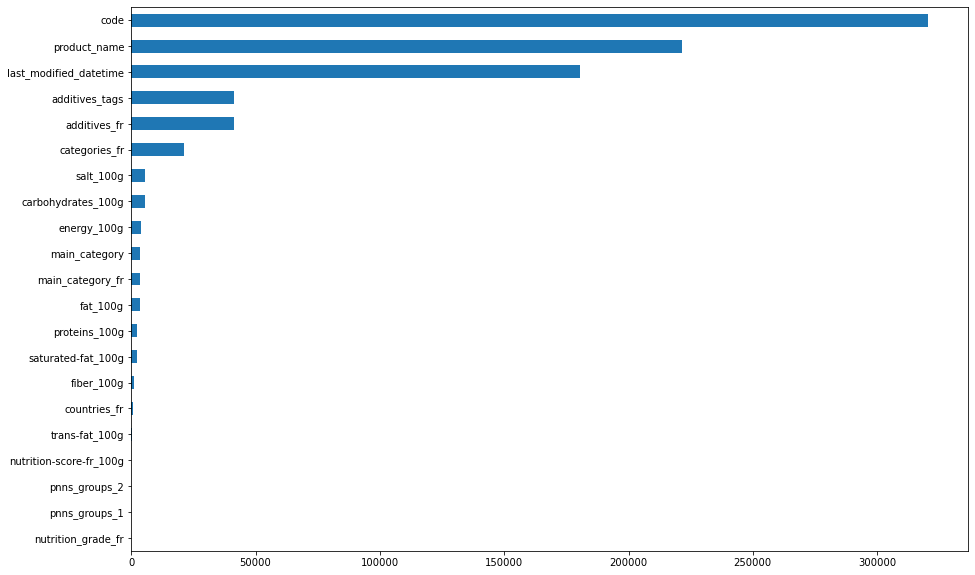

In [75]:
plt.figure(figsize=(15,10))
valeurs_uniques.plot(kind='barh')

<AxesSubplot:ylabel='None'>

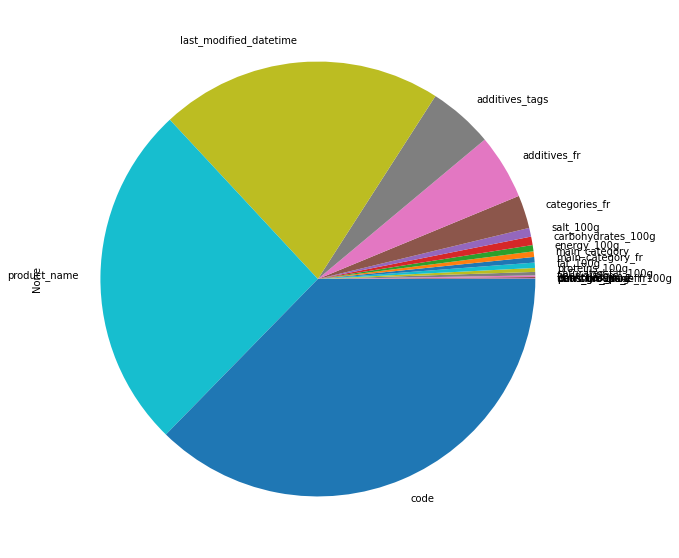

In [76]:
plt.figure(figsize=(10,10))
valeurs_uniques.plot(kind='pie')

In [77]:
df_reduit_avec_taux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     320749 non-null  float64
 1   last_modified_datetime   320772 non-null  object 
 2   product_name             320772 non-null  object 
 3   categories_fr            320772 non-null  object 
 4   countries_fr             320772 non-null  object 
 5   additives_tags           320772 non-null  object 
 6   additives_fr             320772 non-null  object 
 7   nutrition_grade_fr       320772 non-null  object 
 8   pnns_groups_1            320772 non-null  object 
 9   pnns_groups_2            320772 non-null  object 
 10  main_category            320772 non-null  object 
 11  main_category_fr         320772 non-null  object 
 12  energy_100g              261113 non-null  float64
 13  fat_100g                 243891 non-null  float64
 14  satu

##### Traitement de l identifiant 'code'

Le code produit doit etre

    -unique et
    
    -non null

In [78]:
# NOMBRE de VALEURS CODES DUPLIQUEES 
df_reduit_avec_taux['code'].duplicated().sum()

198

In [79]:
# OBSERVATIONS DUPLIQUEES
code_duplicated=df_reduit_avec_taux[df_reduit_avec_taux['code'].duplicated()]
code_duplicated.sort_values('code',ascending=True)

,code,last_modified_datetime,product_name,categories_fr,countries_fr,additives_tags,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
174522,1.00,2017-04-06T07:47:40Z,Pot au feu dégraissé,nan,France,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9892,11778.00,2017-04-02T14:13:05Z,All Butter Reduced Fat Stem Ginger Cookies,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Coo...","France,Royaume-Uni","en:e170,en:e375,en:e322,en:e450,en:e500,en:e503","E170 - Carbonate de calcium,E375 - Acide nicot...",d,Sugary snacks,Biscuits and cakes,en:cookies,Cookies,1809.00,13.30,7.00,NaN,70.20,2.50,6.10,0.83,18.00
481,16117.00,2017-03-09T13:14:18Z,Colossal Olives With Jalapeno Peppers,nan,États-Unis,en:e270,E270 - Acide lactique,nan,nan,nan,nan,nan,347.00,8.33,NaN,NaN,0.00,NaN,0.00,3.39,NaN
519,24600.00,2015-06-27T12:03:12Z,nan,nan,France,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,31233.00,2017-04-02T15:15:37Z,Super chicken spinach & quinoa,nan,"France,Royaume-Uni",nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,58001.00,2017-02-18T15:47:18Z,Bramley Apple Crumble,nan,France,nan,nan,d,nan,nan,nan,nan,1192.00,NaN,7.40,NaN,NaN,2.20,3.20,0.23,12.00
111072,104456.00,2014-12-26T16:38:39Z,Haggis,"Poissons et viandes et oeufs,Abats,en:Haggis",Royaume-Uni,nan,nan,d,unknown,unknown,en:fish-and-meat-and-eggs,Poissons et viandes et oeufs,1205.00,19.00,8.30,NaN,18.40,3.10,9.70,1.68,14.00
111515,129725.00,2016-09-22T21:25:23Z,British Shortcrust Pastry Steak Pie,"Frais,Plats préparés,Plats à base de viande,Pl...","France,Royaume-Uni","en:e170,en:e375","E170 - Carbonate de calcium,E375 - Acide nicot...",c,Composite foods,One-dish meals,en:meals-with-meat,Plats à base de viande,1109.00,14.60,5.90,NaN,23.50,1.20,9.40,0.53,4.00
120240,635646.00,2017-04-02T14:12:51Z,Chargrilled Vegetable & Basil Pesto,"Plats préparés,Pizzas tartes salées et quiches...","France,Royaume-Uni","en:e170,en:e375,en:e330","E170 - Carbonate de calcium,E375 - Acide nicot...",b,Composite foods,Pizza pies and quiche,en:meals,Plats préparés,859.00,7.80,1.90,NaN,24.90,2.00,7.70,0.98,1.00
134825,722810.00,2017-04-02T15:16:13Z,Sea Salt & Balsamic Vinegar hand cooked Crisps,"Snacks salés,Apéritif,Chips et frites,Chips,Ch...","France,Royaume-Uni",nan,nan,d,Salty snacks,Appetizers,en:chips-and-fries,Chips et frites,2173.00,30.40,3.20,NaN,52.80,4.60,6.70,1.83,12.00


In [80]:
# TRAITEMENT de VALEURS 'code' DUPLIQUEES/ strategie:conservation derniere valeurs entrees  
df_reduit_avec_taux = df_reduit_avec_taux.sort_values('last_modified_datetime').drop_duplicates("code", keep = "last")
df_reduit_avec_taux.shape


(320574, 21)

In [81]:
# TRAITEMENT de VALEURS 'code' NULLES
code_null=df_reduit_avec_taux['code'].isna()
code_null.sum()

1

In [82]:
# AFFICHAGE OBSERVATION AVEC VALEURS 'code' NULLES
df_reduit_avec_taux[code_null]

,code,last_modified_datetime,product_name,categories_fr,countries_fr,additives_tags,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
189404,NaN,"en:france,en:switzerland","France,Suisse",6,en:fruit-yogurts,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# SUPPRESSION OBSERVATION AVEC VALEURS 'code' NULLES
df_reduit_avec_taux=df_reduit_avec_taux[~code_null]

In [84]:
# VERIFICATION
df_reduit_avec_taux['code'].isna().sum()

0

#### Traitement  des donnees dupliquees

In [85]:
# NOMBRE DE LIGNES DUPLIQUEES
df_reduit_avec_taux.duplicated().sum()

0

In [86]:
# AFFICHAGE LIGNES DUIPLIQUEES
df_reduit_avec_taux[df_reduit_avec_taux.duplicated()]


,code,last_modified_datetime,product_name,categories_fr,countries_fr,additives_tags,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g


In [87]:
# #SUPPRESSION LIGNES DUPLIQUEES
if df_reduit_avec_taux.duplicated().sum()>1:
    df_reduit_avec_taux.drop_duplicates(keep='first')   
#VERIFICATION
df_reduit_avec_taux.duplicated().sum()

0

#### Suppression code et date_time

In [88]:
# NOMS DE COLONNES
df_reduit_avec_taux.columns

Index(['code', 'last_modified_datetime', 'product_name', 'categories_fr',
       'countries_fr', 'additives_tags', 'additives_fr', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [89]:
# SUPPRESSION  COLONNES 'code', 'last_modified_datetime'
df_reduit_avec_taux.drop(columns=['code','last_modified_datetime'],axis=1, inplace=True)
df_reduit_avec_taux.columns

Index(['product_name', 'categories_fr', 'countries_fr', 'additives_tags',
       'additives_fr', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
       'main_category', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

#### Traitement valeurs aberrantes

##### Suppression des observations dont les valeurs sont superieures a 100 ou <0  et different de null

##### FONCTION 1

In [90]:
#FONCTIONS suppression obsevation avec valeur hors intervalle

def suppr_val_aberr(df,list_col,lim_inf,lim_sup):
    
    for kol in list_col:
        #condition 
        condition=((df[kol].ge(lim_inf) & df[kol].le(lim_sup)) | df[kol].isnull()==True)
#       df=df[condition]
        hors_limite=df[~condition].index
        df.drop(hors_limite,inplace=True)
    return(df)                                 
    

In [91]:
# Extraction provisoire  des variables à traiter
liste_100=df_reduit_avec_taux.filter(regex='_100').columns
print(liste_100)

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-fr_100g'],
      dtype='object')


In [92]:
#EXAMEN DES MINIMUM ET DES MAXIMUM DE CHAQUE VARIABLE
df_reduit_avec_taux.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,260968.00,243747.00,229436.00,143198.00,243442.00,200772.00,259767.00,255363.00,221097.00
mean,1141.92,12.73,5.13,0.07,32.08,2.86,7.08,2.03,9.16
std,6448.92,17.58,8.01,1.54,29.73,12.87,8.41,128.31,9.06
min,0.00,0.00,0.00,-3.57,0.00,-6.70,-800.00,0.00,-15.00
25%,377.00,0.00,0.00,0.00,6.00,0.00,0.70,0.06,1.00
50%,1100.00,5.00,1.79,0.00,20.60,1.50,4.76,0.58,10.00
75%,1674.00,20.00,7.14,0.00,58.33,3.60,10.00,1.37,16.00
max,3251373.00,714.29,550.00,369.00,2916.67,5380.00,430.00,64312.80,40.00


In [93]:
# D'OU LA LISTE A TRAITER
liste_100_final=['fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',]
liste_100_final

['fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'carbohydrates_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g']

In [94]:
# Appel fonction de suppression

df_reduit_avec_taux=suppr_val_aberr(df_reduit_avec_taux,liste_100_final,0,100)


In [95]:
# VERIFICATION
df_reduit_avec_taux.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,260776.00,243560.00,229348.00,143126.00,243253.00,200695.00,259584.00,255172.00,221018.00
mean,1140.95,12.73,5.12,0.07,32.07,2.83,7.08,1.59,9.16
std,6431.80,17.51,7.91,0.95,29.14,4.59,8.16,6.24,9.06
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-15.00
25%,377.00,0.00,0.00,0.00,6.00,0.00,0.70,0.06,1.00
50%,1100.00,5.00,1.79,0.00,20.69,1.50,4.76,0.58,10.00
75%,1674.00,20.00,7.14,0.00,58.33,3.60,10.00,1.37,16.00
max,3251373.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,40.00


In [96]:
df_reduit_avec_taux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320377 entries, 249418 to 211769
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             320377 non-null  object 
 1   categories_fr            320377 non-null  object 
 2   countries_fr             320377 non-null  object 
 3   additives_tags           320377 non-null  object 
 4   additives_fr             320377 non-null  object 
 5   nutrition_grade_fr       320377 non-null  object 
 6   pnns_groups_1            320377 non-null  object 
 7   pnns_groups_2            320377 non-null  object 
 8   main_category            320377 non-null  object 
 9   main_category_fr         320377 non-null  object 
 10  energy_100g              260776 non-null  float64
 11  fat_100g                 243560 non-null  float64
 12  saturated-fat_100g       229348 non-null  float64
 13  trans-fat_100g           143126 non-null  float64
 14 

In [97]:
# VALEURS NULLE DU DATASET A CE STADE
df_reduit_avec_taux.isnull().sum()

product_name                    0
categories_fr                   0
countries_fr                    0
additives_tags                  0
additives_fr                    0
nutrition_grade_fr              0
pnns_groups_1                   0
pnns_groups_2                   0
main_category                   0
main_category_fr                0
energy_100g                 59601
fat_100g                    76817
saturated-fat_100g          91029
trans-fat_100g             177251
carbohydrates_100g          77124
fiber_100g                 119682
proteins_100g               60793
salt_100g                   65205
nutrition-score-fr_100g     99359
dtype: int64

In [98]:
# DIMENSION DU DATASET A CE STADE
df_reduit_avec_taux.shape

(320377, 19)

REMARQUE:
    
    nous constatons une diminition significative du nombre d observations

##### Traitement valeurs aberrantes   variable 'energy_100g'

Recherche des bornes sur internet:

    limite inferieure=0
    
    limite superieure=3000

In [99]:
# TRAITEMENT VAR 'energy_100g'

In [100]:
#limite variable energy_100: 0, 3000
df_reduit_avec_taux=suppr_val_aberr(df_reduit_avec_taux,['energy_100g'],0,3000)


In [101]:
# Controle si les limites ont été pris en compte
df_reduit_avec_taux.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,256715.00,239918.00,225394.00,140854.00,239700.00,199050.00,255613.00,251311.00,218940.00
mean,1088.84,11.55,4.81,0.07,32.50,2.85,7.17,1.61,9.08
std,747.75,14.63,6.97,0.93,29.10,4.59,8.16,6.29,9.05
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-15.00
25%,370.00,0.00,0.00,0.00,6.45,0.00,0.80,0.07,1.00
50%,1075.00,4.73,1.79,0.00,21.43,1.50,4.90,0.60,10.00
75%,1645.00,19.64,7.06,0.00,59.00,3.60,10.00,1.39,16.00
max,3000.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,40.00


##### Methode Interquartile Fonction

##### FONCTIONS 2

In [102]:
#CALCUL LIMITE INFERIEURE
def calc_limQ1(s):
        Q1=s.quantile(0.25)
        Q3=s.quantile(0.75)
        IQR=Q3-Q1
        limQ1=Q1-1.5*IQR
        return(limQ1)

In [103]:
# CALCUL LIMITE SUPERIEURE
def calc_limQ3(s):
        Q1=s.quantile(0.25)
        Q3=s.quantile(0.75)
        IQR=Q3-Q1
        limQ3=Q3+1.5*IQR
        return(limQ3)

##### FONCTION 3

In [104]:
def suppr_outliers_diff_NaN(df,varGroupe,colAtraiter):
    '''
    df=Dataframe,
    varGroupe=var de regroup,
    colAtraiter=cols a traiter
    '''
    for col in colAtraiter:
        # Calcul des limites inf et sup
        df=df.merge(df.groupby(varGroupe)[col].apply(lambda x:calc_limQ1(x)).reset_index(name='limQ1'),on=varGroupe,how='left')
        df=df.merge(df.groupby(varGroupe)[col].apply(lambda x:calc_limQ3(x)).reset_index(name='limQ3'),on=varGroupe,how='left')
        # Determination conditions
        condition1=((df[col]<df.limQ1) | (df[col]>df.limQ3))
        condition2=(df[col].isnull() == False)
   
        # Suppression des outliers
        outlier_idx=df[(condition2 & condition1)].index.to_list()
        df.drop(outlier_idx,inplace=True)
        df.drop(['limQ1','limQ3'],axis=1,inplace=True )
    return(df)

##### Suppression des outliers par groupes homogenes: methode du quartile

#####  1-Regroupement des observations par ''pnns_groups_1''

In [105]:
#TEST
df_reduit_avec_taux.columns

Index(['product_name', 'categories_fr', 'countries_fr', 'additives_tags',
       'additives_fr', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
       'main_category', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [106]:
# 1 REGROUPEMENT DES OBSERVATIONS PAR 'pnns_groups_1' et description
gby_pnns_groups_1=df_reduit_avec_taux.groupby(('pnns_groups_1'))
gby_pnns_groups_1.describe().T


pnns_groups_1                  Beverages  Cereals and potatoes  \
energy_100g             count    6331.00               7430.00   
                        mean      265.26               1357.12   
                        std       356.13                476.82   
                        min         0.00                  0.00   
                        25%       119.00               1125.00   
                        50%       184.00               1493.00   
                        75%       218.00               1610.00   
                        max      2954.00               2923.00   
fat_100g                count    5522.00               7141.00   
                        mean        0.83                  6.04   
                        std         2.89                  8.64   
                        min         0.00                  0.00   
                        25%         0.00                  1.50   
                        50%         0.00                  2.90   
                        75%         0.50                  7.00   
                        max        38.00                 72.00   
saturated-fat_100g      count    5791.00               6914.00   
                        mean        0.51                  1.71   
                        std         2.59                  2.74   
                        min         0.00                  0.00   
                        25%         0.00                  0.30   
                        50%         0.00                  0.60   
                        75%         0.10                  1.80   
                        max        77.00                 31.00   
trans-fat_100g          count     105.00                232.00   
                        mean        0.00                  0.02   
                        std         0.02                  0.14   
                        min         0.00                  0.00   
                        25%         0.00                  0.00   
                        50%         0.00                  0.00   
                        75%         0.00                  0.00   
                        max         0.10                  1.78   
carbohydrates_100g      count    5669.00               7138.00   
                        mean       13.00                 55.11   
                        std        18.14                 22.98   
                        min         0.00                  0.00   
                        25%         5.20                 42.00   
                        50%         9.80                 64.00   
                        75%        11.40                 72.00   
                        max       100.00                 91.20   
fiber_100g              count    3792.00               5981.00   
                        mean        0.66                  5.41   
                        std         3.17                  4.83   
                        min         0.00                  0.00   
                        25%         0.00                  2.90   
                        50%         0.10                  4.00   
                        75%         0.50                  6.80   
                        max        45.30                 57.60   
proteins_100g           count    6181.00               7394.00   
                        mean        0.88                 10.12   
                        std         2.93                  5.05   
                        min         0.00                  0.00   
                        25%         0.00                  7.40   
                        50%         0.30                  9.40   
                        75%         0.60                 12.00   
                        max        86.00                 80.00   
salt_100g               count    6087.00               6887.00   
                        mean        0.14                  0.65   
                        std         1.85                  0.86   
                        min         0.00

Beverages                       AxesSubplot(0.1,0.736957;0.173913x0.163043)
Cereals and potatoes       AxesSubplot(0.308696,0.736957;0.173913x0.163043)
Composite foods            AxesSubplot(0.517391,0.736957;0.173913x0.163043)
Fat and sauces             AxesSubplot(0.726087,0.736957;0.173913x0.163043)
Fish Meat Eggs                  AxesSubplot(0.1,0.541304;0.173913x0.163043)
Fruits and vegetables      AxesSubplot(0.308696,0.541304;0.173913x0.163043)
Milk and dairy products    AxesSubplot(0.517391,0.541304;0.173913x0.163043)
Salty snacks               AxesSubplot(0.726087,0.541304;0.173913x0.163043)
Sugary snacks                   AxesSubplot(0.1,0.345652;0.173913x0.163043)
cereals-and-potatoes       AxesSubplot(0.308696,0.345652;0.173913x0.163043)
fruits-and-vegetables      AxesSubplot(0.517391,0.345652;0.173913x0.163043)
nan                        AxesSubplot(0.726087,0.345652;0.173913x0.163043)
salty-snacks                        AxesSubplot(0.1,0.15;0.173913x0.163043)
sugary-snack

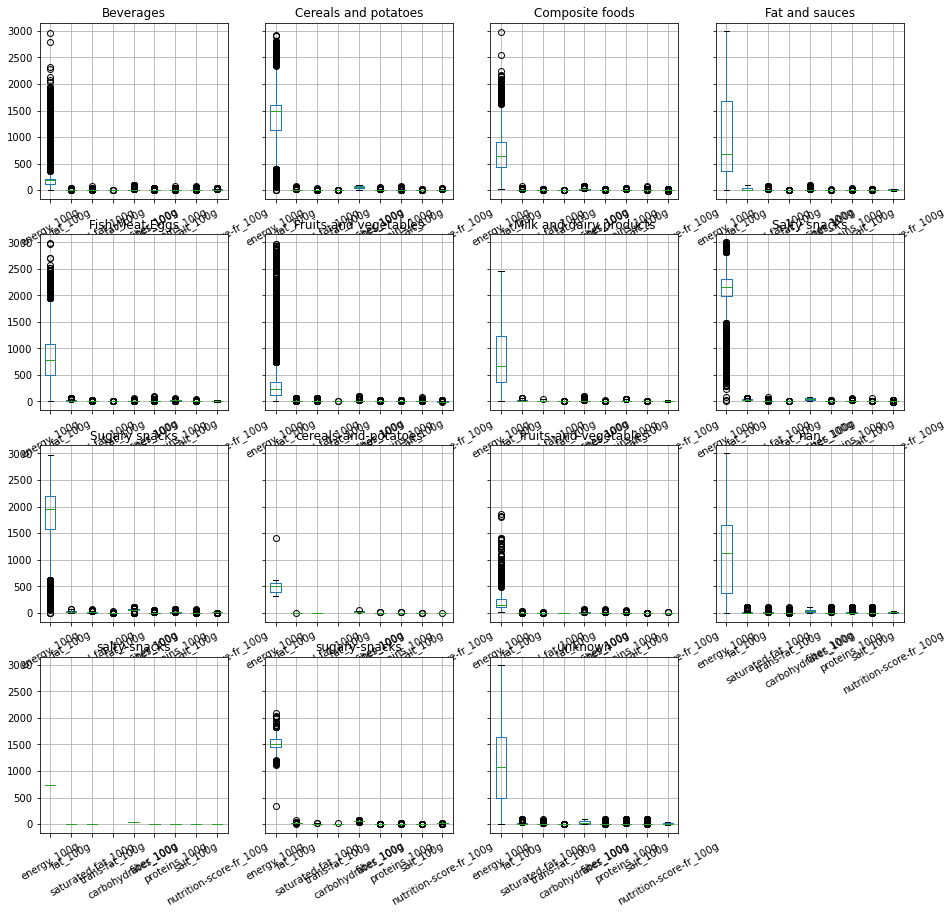

In [107]:
# MISE EN EVIDENCE DES OUTLIERS PAR BOXPLOT POUR
gby_pnns_groups_1.boxplot(figsize=(15,15),rot=30)


REMARQUES: GRAPHES TRES TASSEES

##### Suppression  des outliers  par  categories

In [108]:
# EXTRACTION DES COLONNES A TRAITER
col_a_traiter=df_reduit_avec_taux.select_dtypes(include=np.number).columns.to_list()
col_a_traiter

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'carbohydrates_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

In [109]:
# EFFECTIF DES GROUPES
groupes=df_reduit_avec_taux['pnns_groups_1'].value_counts()
groupes

nan                        225977
unknown                     22491
Sugary snacks               12349
Beverages                    9028
Milk and dairy products      8822
Cereals and potatoes         8434
Fish Meat Eggs               8036
Composite foods              6742
Fruits and vegetables        5901
Fat and sauces               4248
Salty snacks                 2789
fruits-and-vegetables         987
sugary-snacks                 495
cereals-and-potatoes           16
salty-snacks                    1
Name: pnns_groups_1, dtype: int64

REMARQUES:

1-nan et unknow  designent des valeurs manquantes sous des formats non conformes. 

2-Fruits and vegetables et  fruits-and-vegetables  semblent designer un même concept.       41

 PROCEDONS A LA CORRECTION DE 1- ET 2-

In [110]:

# 0-SUPPRESSION DES ESPACES BLANCS
df_reduit_avec_taux['pnns_groups_1']=df_reduit_avec_taux['pnns_groups_1'].str.strip()

In [111]:

# 1-REMPLACEMENT DE nan et unknow par NaN
df_reduit_avec_taux['pnns_groups_1'].replace({'nan':np.nan,'unknown':np.nan},inplace=True)
df_reduit_avec_taux['pnns_groups_2'].replace({'nan':np.nan,'unknown':np.nan},inplace=True)

# 2-REMPLACEMENT DE fruits-and-vegetables PAR fruits and vegetables 
df_reduit_avec_taux['pnns_groups_1'].replace({'fruits-and-vegetables':'Fruits and vegetables'},inplace=True)


In [112]:
df_reduit_avec_taux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316316 entries, 249418 to 211769
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             316316 non-null  object 
 1   categories_fr            316316 non-null  object 
 2   countries_fr             316316 non-null  object 
 3   additives_tags           316316 non-null  object 
 4   additives_fr             316316 non-null  object 
 5   nutrition_grade_fr       316316 non-null  object 
 6   pnns_groups_1            67848 non-null   object 
 7   pnns_groups_2            70825 non-null   object 
 8   main_category            316316 non-null  object 
 9   main_category_fr         316316 non-null  object 
 10  energy_100g              256715 non-null  float64
 11  fat_100g                 239918 non-null  float64
 12  saturated-fat_100g       225394 non-null  float64
 13  trans-fat_100g           140854 non-null  float64
 14 

In [113]:
# NOMBRE DE PRODUITS PAR CATEGORIES REAFFICHAGE
groupes=df_reduit_avec_taux['pnns_groups_1'].value_counts()
groupes

Sugary snacks              12349
Beverages                   9028
Milk and dairy products     8822
Cereals and potatoes        8434
Fish Meat Eggs              8036
Fruits and vegetables       6888
Composite foods             6742
Fat and sauces              4248
Salty snacks                2789
sugary-snacks                495
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

NB: Salty snacks et sugary-snacks représente un même concept: à corriger  

In [114]:
df_reduit_avec_taux.loc[df_reduit_avec_taux['pnns_groups_1']=='salty-snacks','pnns_groups_1']='Salty snacks'

In [115]:
# NOMBRE DE PRODUITS PAR CATEGORIES REAFFICHAGE de CONTROLE
groupes=df_reduit_avec_taux['pnns_groups_1'].value_counts()
groupes

Sugary snacks              12349
Beverages                   9028
Milk and dairy products     8822
Cereals and potatoes        8434
Fish Meat Eggs              8036
Fruits and vegetables       6888
Composite foods             6742
Fat and sauces              4248
Salty snacks                2790
sugary-snacks                495
cereals-and-potatoes          16
Name: pnns_groups_1, dtype: int64

In [116]:
# VERIFICATION
df_reduit_avec_taux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316316 entries, 249418 to 211769
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             316316 non-null  object 
 1   categories_fr            316316 non-null  object 
 2   countries_fr             316316 non-null  object 
 3   additives_tags           316316 non-null  object 
 4   additives_fr             316316 non-null  object 
 5   nutrition_grade_fr       316316 non-null  object 
 6   pnns_groups_1            67848 non-null   object 
 7   pnns_groups_2            70825 non-null   object 
 8   main_category            316316 non-null  object 
 9   main_category_fr         316316 non-null  object 
 10  energy_100g              256715 non-null  float64
 11  fat_100g                 239918 non-null  float64
 12  saturated-fat_100g       225394 non-null  float64
 13  trans-fat_100g           140854 non-null  float64
 14 

REMARQUE: 

pnns_groups_1 n'a plus que 67848 valeurs; il y a plusieurs valeurs manquantes

<AxesSubplot:>

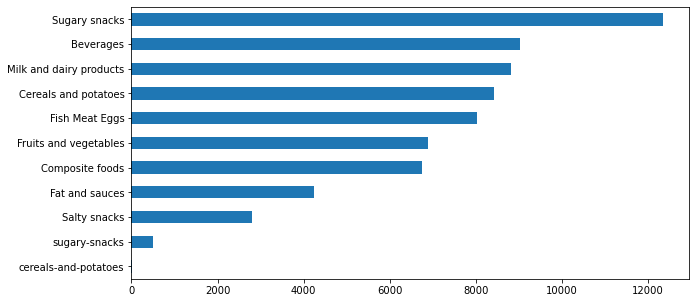

In [117]:
#GRAPHIQUE DES EFFECTIFS
df_reduit_avec_taux['pnns_groups_1'].value_counts().sort_values().plot(kind='barh',figsize=(10,5))

##### Traitement des valeurs outliers par groupe homogenes



#####  SUPPRESSION

In [118]:
# Suppression des outliers par par groupe et colonnes
#                     DataFrame  Groupe  Colonne à traiter 
#                            |       |               |

df_reduit_avec_taux_sout=suppr_outliers_diff_NaN(df_reduit_avec_taux,'pnns_groups_1',col_a_traiter)
        
df_reduit_avec_taux_sout.shape

(301430, 19)

In [119]:
df_reduit_avec_taux_sout

,product_name,categories_fr,countries_fr,additives_tags,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Attiéké,"Epicerie,Attieke,Couscous,Couscous-de-manioc",Belgique,nan,nan,nan,NaN,NaN,fr:couscous,Couscous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Poudre cristallisée à base de bouleau - Xylitol,Édulcorants,France,en:e967,E967 - Xylitol,b,NaN,NaN,en:sweeteners,Édulcorants,1000.00,0.50,0.10,NaN,100.00,0.50,0.50,0.01,2.00
2,Sumac,"Aliments et boissons à base de végétaux,Alimen...",Portugal,nan,nan,nan,NaN,NaN,en:spices,Epices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Indian tonic,"Boissons,Boissons gazeuses,Sodas,Boissons sucrées",Portugal,"en:e290,en:e330","E290 - Dioxyde de carbone,E330 - Acide citrique",nan,Beverages,Sweetened beverages,en:sodas,Sodas,156.00,0.00,NaN,NaN,8.90,NaN,0.00,NaN,NaN
4,"Bonbons durs, cerise sauvage","Snacks sucrés,Confiseries,Bonbons",nan,en:e330,E330 - Acide citrique,nan,Sugary snacks,Sweets,en:candies,Bonbons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302273,nan,nan,États-Unis,nan,nan,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302274,Edulcorant Liquide,"Édulcorants,Additifs alimentaires,Succédanés d...",France,"en:e952,en:e330,en:e200,en:e957","E952 - Acide cyclamique et ses sels,E330 - Aci...",c,NaN,NaN,en:sweeteners,Édulcorants,2.40,0.00,0.00,NaN,0.10,NaN,0.00,1.35,5.00
302275,le bio de manon,nan,France,nan,nan,e,NaN,NaN,nan,nan,2146.00,33.60,29.90,NaN,58.40,NaN,2.30,0.00,23.00
302276,Chocolat Noir Costa Rica 75% De Cacao,"Snacks sucrés,Chocolats,Chocolats noirs",France,nan,nan,e,Sugary snacks,Chocolate products,en:chocolates,Chocolats,2404.00,44.00,27.00,NaN,30.00,NaN,10.00,0.03,22.00


Beverages                       AxesSubplot(0.1,0.736957;0.235294x0.163043)
Cereals and potatoes       AxesSubplot(0.382353,0.736957;0.235294x0.163043)
Composite foods            AxesSubplot(0.664706,0.736957;0.235294x0.163043)
Fat and sauces                  AxesSubplot(0.1,0.541304;0.235294x0.163043)
Fish Meat Eggs             AxesSubplot(0.382353,0.541304;0.235294x0.163043)
Fruits and vegetables      AxesSubplot(0.664706,0.541304;0.235294x0.163043)
Milk and dairy products         AxesSubplot(0.1,0.345652;0.235294x0.163043)
Salty snacks               AxesSubplot(0.382353,0.345652;0.235294x0.163043)
Sugary snacks              AxesSubplot(0.664706,0.345652;0.235294x0.163043)
cereals-and-potatoes                AxesSubplot(0.1,0.15;0.235294x0.163043)
sugary-snacks                  AxesSubplot(0.382353,0.15;0.235294x0.163043)
dtype: object

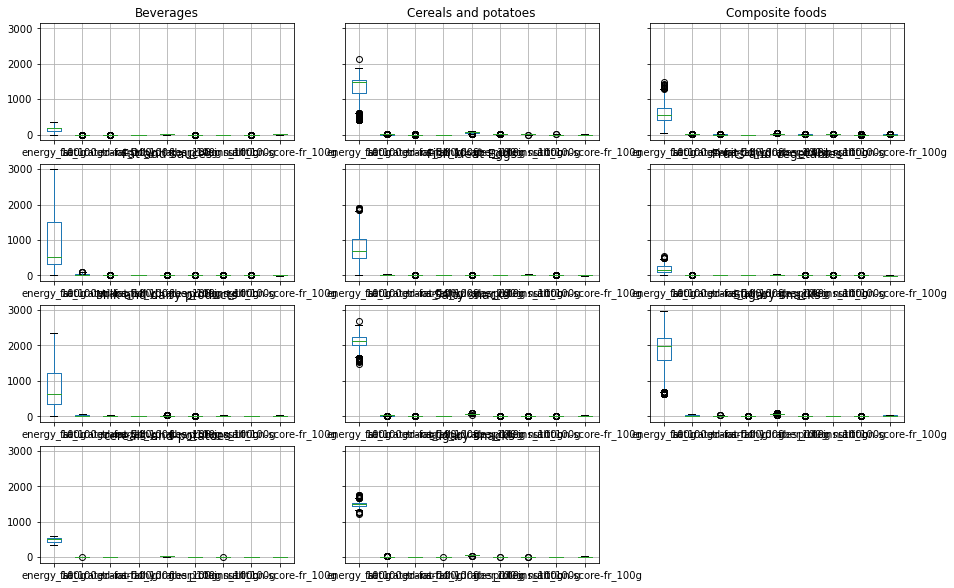

In [120]:
#test
df_reduit_avec_taux_sout.groupby('pnns_groups_1').boxplot(figsize=(15,10))

### Traitement des valeurs  manquantes

#### SUPPRIMER les observations impossible à imputer

df.columns
'''
NB 
    Donnees manquantes impossible a deviner  MCAR? MAR?  NMAR?
    observation avec donnees manquantes a supprimer des colonnes suivantes:
  
 
    'product_name', 
    'categories_fr', 
    'countries_fr', 
    'additives_tags',
    'additives_fr', 
    'nutrition_grade_fr',
     nutrition-score-fr_100g: 
 '''   

In [121]:
a_suppr=[
    'product_name', 
    'categories_fr', 
    'countries_fr', 
    'additives_tags',
    'additives_fr', 
    'nutrition_grade_fr',
    'nutrition-score-fr_100g' 
]

#Suppression des observations correspondantes a valeur nulle
df_reduit_avec_taux_sout=df_reduit_avec_taux_sout.dropna(subset=a_suppr)
df_reduit_avec_taux_sout.head()

,product_name,categories_fr,countries_fr,additives_tags,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
1,Poudre cristallisée à base de bouleau - Xylitol,Édulcorants,France,en:e967,E967 - Xylitol,b,NaN,NaN,en:sweeteners,Édulcorants,1000.00,0.50,0.10,NaN,100.00,0.50,0.50,0.01,2.00
5,Linguine al pesto,pt:Pates-au-pesto,Portugal,nan,nan,a,NaN,NaN,pt:pates-au-pesto,pt:Pates-au-pesto,1467.00,1.90,0.40,NaN,70.00,4.20,12.00,0.25,-5.00
7,Soupe de queue de boeuf (potage oxtail),"pt:Potages,pt:Soupes",Portugal,"en:e621,en:e631,en:e627,en:e150d","E621 - Glutamate monosodique,E631 - Inosinate ...",d,NaN,NaN,pt:potages,pt:Potages,1557.00,11.90,0.50,NaN,51.80,1.90,13.00,14.73,13.00
8,Spaghetti classica,pt:Pates-alimentaires,Portugal,nan,nan,a,NaN,NaN,pt:pates-alimentaires,pt:Pates-alimentaires,1478.00,1.80,0.40,NaN,71.00,3.60,12.00,0.01,-5.00
14,Pain spécial de campagne,"Aliments et boissons à base de végétaux,Alimen...",France,nan,nan,b,Cereals and potatoes,Bread,en:breads,Pains,1166.00,4.40,0.40,NaN,47.80,3.20,9.70,1.45,0.00


#### Variable proteine_100

In [122]:
df_reduit_avec_taux_sout.isna().sum()

product_name                    0
categories_fr                   0
countries_fr                    0
additives_tags                  0
additives_fr                    0
nutrition_grade_fr              0
pnns_groups_1              169256
pnns_groups_2              169149
main_category                   0
main_category_fr                0
energy_100g                   189
fat_100g                    16270
saturated-fat_100g            189
trans-fat_100g              71027
carbohydrates_100g          16272
fiber_100g                  22610
proteins_100g                 189
salt_100g                     189
nutrition-score-fr_100g         0
dtype: int64

In [123]:
# test
df_reduit_avec_taux_sout.to_csv('df_reduit_avec_taux_sout.csv')

#### Corrélation et remplacement des valeurs manquantes 

<AxesSubplot:>

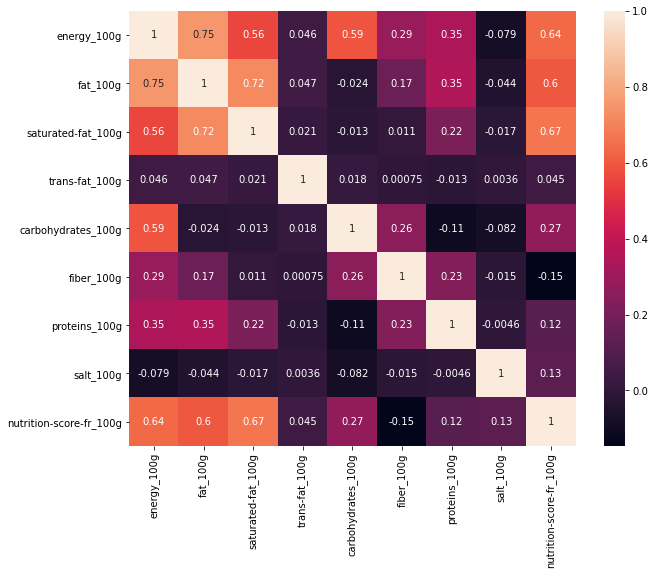

In [124]:
#AFFICHAGE GRAPHIQUE DES CORRELATIONS
corr=df_reduit_avec_taux.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True)


#### Remplacement des valeurs manquantes par: 0, moy ou mediane

In [125]:
# df_reduit_new.fillna(df_reduit_new.mean(),axis=0)
col_a_traiter=[ 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g','nutrition-score-fr_100g']
df1=df_reduit_avec_taux_sout

for col in col_a_traiter:
    df1[col].fillna(df1.groupby(['pnns_groups_1'])[col].transform('median'),inplace=True)
    df1[col].fillna(df1.groupby(['pnns_groups_2'])[col].transform('median'),inplace=True)

#     df1[col] = df1.groupby('pnns_groups_1')[col].transform(lambda x: x.fillna(x.median()))

/home/pcb/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Sauvegarde du fichier

##### Suppression avant sauvegarde

In [126]:
df_reduit_final=df1
df_reduit_final.columns

Index(['product_name', 'categories_fr', 'countries_fr', 'additives_tags',
       'additives_fr', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
       'main_category', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [127]:
df_reduit_final=df_reduit_final.drop( 
    labels=None,
    axis=1,
    index=None,
    columns=['additives_tags','pnns_groups_2','main_category','main_category_fr'],
    level=None,
    inplace=False,
    errors='raise',
)


In [128]:
df_reduit_final.columns

Index(['product_name', 'categories_fr', 'countries_fr', 'additives_fr',
       'nutrition_grade_fr', 'pnns_groups_1', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

##### Sauvegarde

In [129]:
df_reduit_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205191 entries, 1 to 302276
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             205191 non-null  object 
 1   categories_fr            205191 non-null  object 
 2   countries_fr             205191 non-null  object 
 3   additives_fr             205191 non-null  object 
 4   nutrition_grade_fr       205191 non-null  object 
 5   pnns_groups_1            35935 non-null   object 
 6   energy_100g              205114 non-null  float64
 7   fat_100g                 190571 non-null  float64
 8   saturated-fat_100g       205114 non-null  float64
 9   trans-fat_100g           169449 non-null  float64
 10  carbohydrates_100g       190591 non-null  float64
 11  fiber_100g               196315 non-null  float64
 12  proteins_100g            205114 non-null  float64
 13  salt_100g                205114 non-null  float64
 14  nutr

In [130]:
df_reduit_final.isna().sum()/df_reduit_final.shape[0]

product_name              0.00
categories_fr             0.00
countries_fr              0.00
additives_fr              0.00
nutrition_grade_fr        0.00
pnns_groups_1             0.82
energy_100g               0.00
fat_100g                  0.07
saturated-fat_100g        0.00
trans-fat_100g            0.17
carbohydrates_100g        0.07
fiber_100g                0.04
proteins_100g             0.00
salt_100g                 0.00
nutrition-score-fr_100g   0.00
dtype: float64

OBSERVATION:

   1 -Nous avons un tres grand nombre de donnees manquantes pour  pnns_groups_1: la 
    
    variable peut etre supprimée.

   2 -Pour les autres il y a tres peu de valeurs 
    
    manquantes: on supprime les observations ayant des

    valeurs manquantes, le but etant de na pas avoir de

    valeurs manquantes  dans le fichier.

In [131]:
# 1 SUPPRESSION VARIABLE 'pnns_groups_1'
df_reduit_final.drop('pnns_groups_1',axis=1,inplace=True)


In [132]:
df_reduit_final.dropna(how='any',inplace=True)
df_reduit_final.isna().sum()/df_reduit_final.shape[0]

product_name              0.00
categories_fr             0.00
countries_fr              0.00
additives_fr              0.00
nutrition_grade_fr        0.00
energy_100g               0.00
fat_100g                  0.00
saturated-fat_100g        0.00
trans-fat_100g            0.00
carbohydrates_100g        0.00
fiber_100g                0.00
proteins_100g             0.00
salt_100g                 0.00
nutrition-score-fr_100g   0.00
dtype: float64

In [133]:
df_reduit_final.shape

(166278, 14)

In [134]:

df_reduit_final.to_csv('df_reduit_cleaned.csv')

In [135]:
########################################  FIN  ############################################